In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

from utils.feature_engineering import preprocess
from database.main import Database
db = Database()

%load_ext autoreload
%autoreload 2

%matplotlib inline

[nltk_data] Downloading package stopwords to /home/marco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/marco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = db.read_articles()
df = preprocess(df)
df.head()

,category,title,content,topics,published_on
0,lifeandstyle,"[pandemic, epiphany, id, happy, parent, fulltime]","[back, february, fellow, mom, oneyearold, disc...","[Family, My pandemic epiphany, Children, Paren...",2020-06-12 06:45:54.008
1,sport,"[afl, still, facing, significant, financial, c...","[afl, season, resumption, delivered, recordbre...","[AFL, Australian rules football, Australia spo...",2020-06-12 06:45:54.005
2,global-development,"[global, protest, throw, spotlight, alleged, p...","[student, eden, armando, bebari, 19, allegedly...","[Human rights, Black Lives Matter movement, Ge...",2020-06-12 06:45:54.002
3,sport,"[héritier, lumumba, reject, collingwoods, offe...","[héritier, lumumba, say, intention, facilitati...","[AFL, Australian rules football, Australia spo...",2020-06-12 06:45:54.005
4,politics,"[brexit, uk, expected, backtrack, full, eu, bo...","[government, expected, backtrack, plan, introd...","[Brexit, European Union, news]",2020-06-12 06:45:54.001


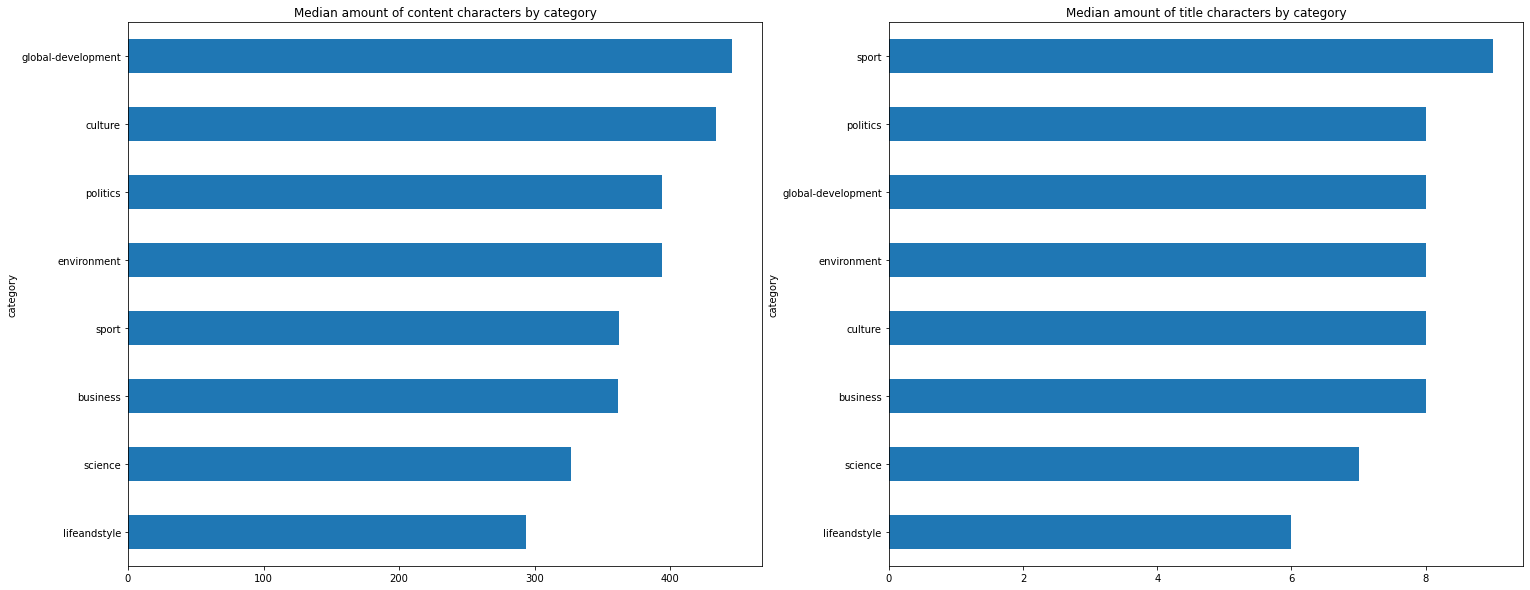

In [3]:
df['cnt_char_amt'] = df['content'].apply(len)
df['title_char_amt'] = df['title'].apply(len)

group = df.groupby("category")
content_char_avg = group['cnt_char_amt'].apply(np.median)
title_char_avg = group['title_char_amt'].apply(np.median)


fig, ax = plt.subplots(1, 2, figsize=(25, 10))

content_char_avg.sort_values().plot(kind='barh', ax=ax[0])
ax[0].set_title("Median amount of content characters by category")

title_char_avg.sort_values().plot(kind='barh', ax=ax[1])
ax[1].set_title("Median amount of title characters by category")


plt.rc('font', size=11) 
plt.show()

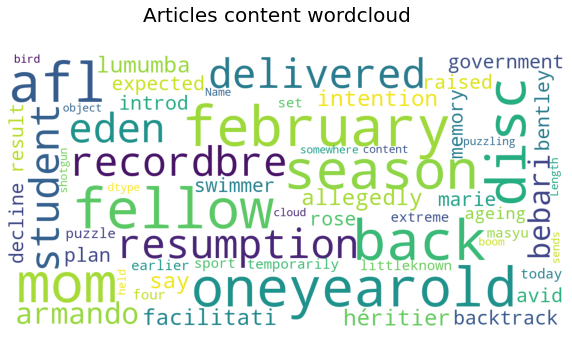

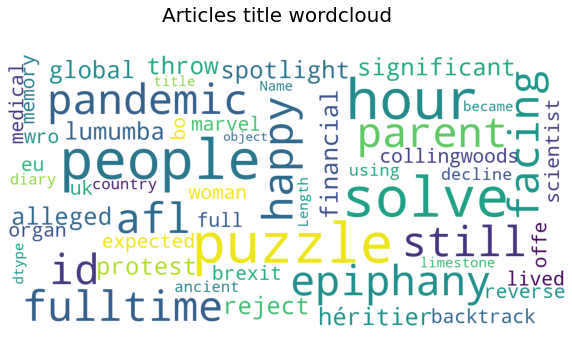

In [4]:
stopwords = set(STOPWORDS)

def wordcloud(text, title):
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        scale=3,
        max_words=200,
        max_font_size=40
    ).generate(str(text))

    fig = plt.figure(1, figsize=(10, 7))
    
    
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=1.1)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud(df['content'], title="Articles content wordcloud")
wordcloud(df['title'], title="Articles title wordcloud")

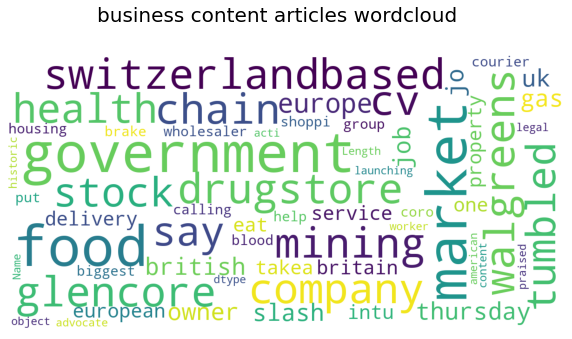

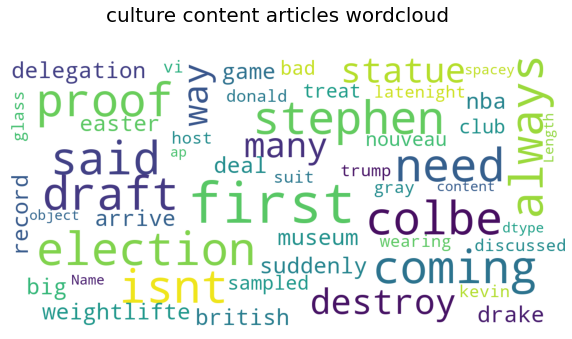

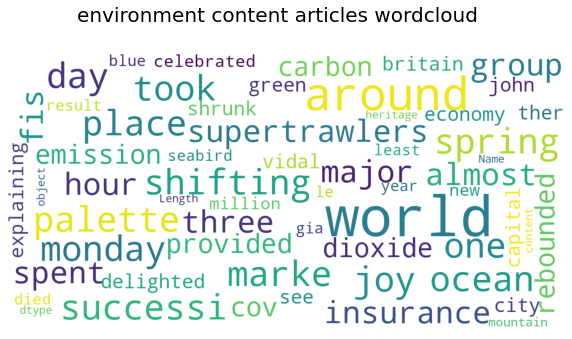

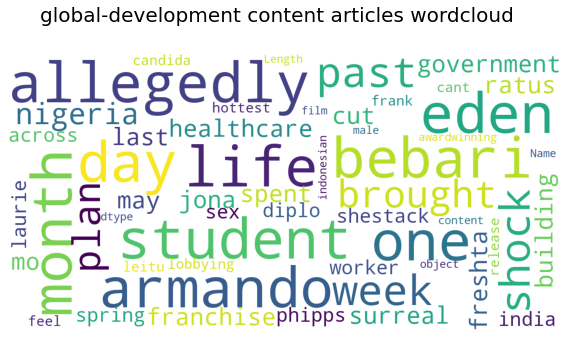

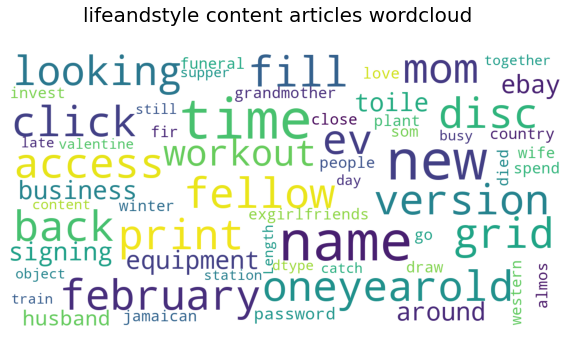

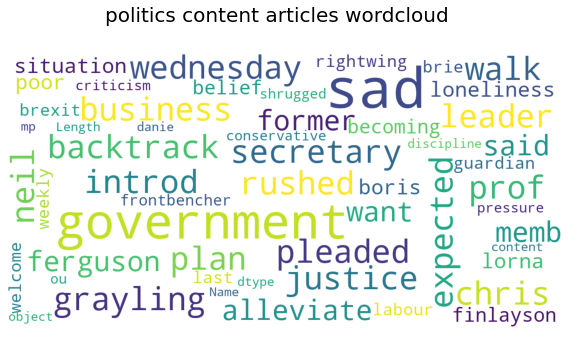

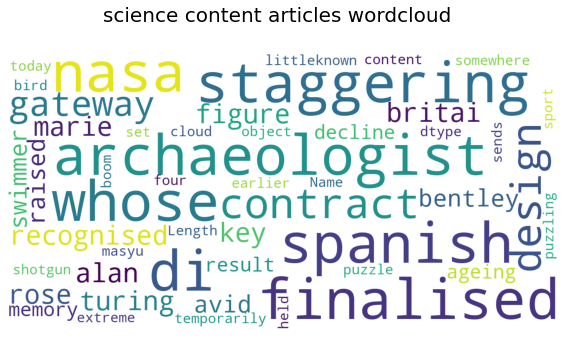

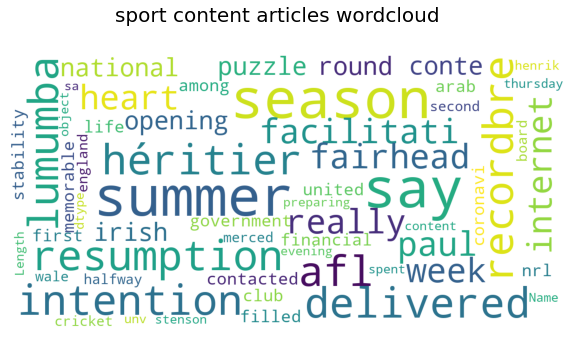

In [5]:
for group, data in df.groupby("category"):
    wordcloud(data['content'], title=f"{group} content articles wordcloud")

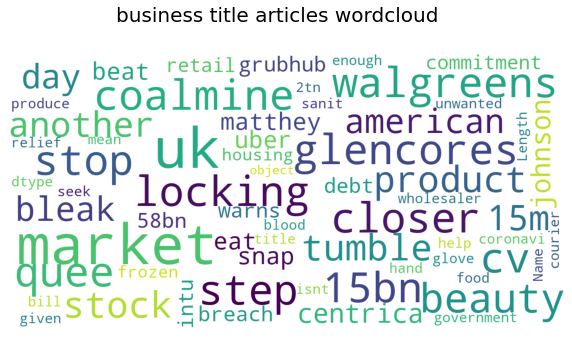

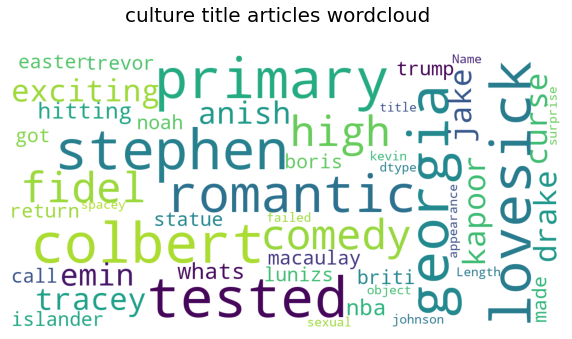

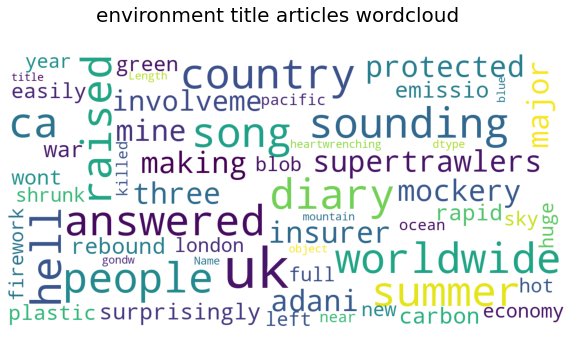

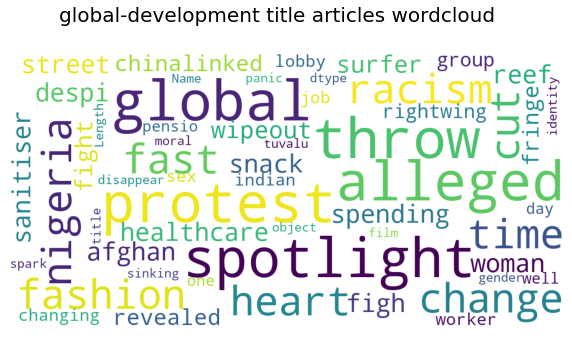

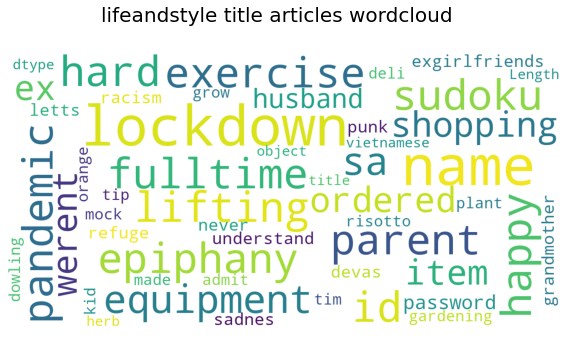

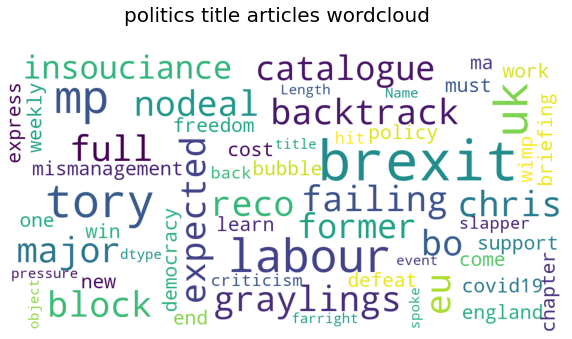

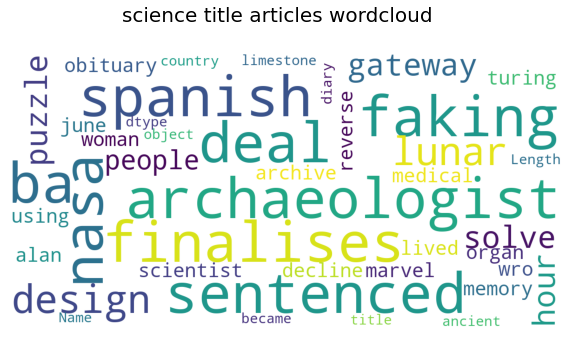

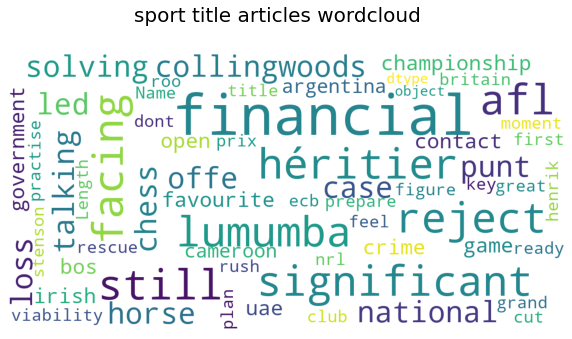

In [6]:
for group, data in df.groupby("category"):
    wordcloud(data['title'], title=f"{group} title articles wordcloud")